In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
def defineMask():
    mask = [[1,1,1],[1,1,1],[1,1,1]]
    return mask

In [19]:
def myDilation(img1, mask):
    m = img1.shape[0]
    n = img1.shape[1]
    img2 = np.random.randint(0,1,(img1.shape[0],img1.shape[1]))
    for i in range(1,m-1):
        for j in range(1,n-1):
            x1 = img1[i,j] and mask[1][1]  #center

            x2 = img1[i-1,j-1] and mask[0][0] #scan
            x3 = img1[i-1,j] and mask[0][1]
            x4 = img1[i-1,j+1] and mask[0][2]

            x5 = img1[i,j-1] and mask[1][0]
            x6 = img1[i,j+1] and mask[1][2]

            x7 = img1[i+1,j-1] and mask[2][0]
            x8 = img1[i+1,j] and mask[2][1]
            x9 = img1[i+1,j+1] and mask[2][2]

            result1 = x1 or x2 or x3 or x4 or x5
            result2 = x6 or x7 or x8 or x9

            result = result1 or result2

            img2[i,j] = result

    return img2

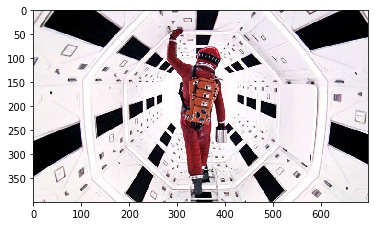

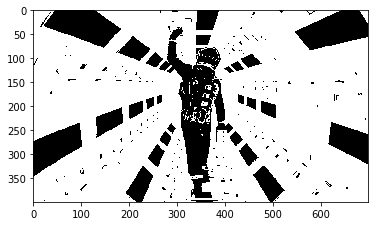

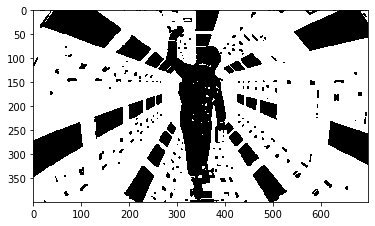

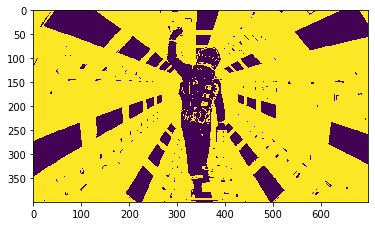

In [20]:
test = plt.imread("images.jpeg")
bw = np.zeros(test.shape[0:2], dtype=int)

threshold = 120
for i in range(test.shape[0]):
    for j in range(test.shape[1]):
        n = test[i,j,0]/3 + test[i,j,1]/3 + test[i,j,2]/3
        if n > threshold:
            bw[i,j] = 0
        else:
            bw[i,j] = 255

dilated = myDilation(bw,defineMask()) # print dilated image
plt.imshow(test) #default image
plt.show()

plt.imshow(bw, plt.cm.binary) #bw image
plt.show()

plt.imshow(dilated, plt.cm.binary) #dilated image
plt.show()

plt.imshow(dilated-bw)
plt.show()

In [21]:
def convert_RGB_to_gray_level(image_1):
    img_1=plt.imread(image_1)
    img_2=np.zeros((img_1.shape[0],img_1.shape[1]))
    for i in range(img_2.shape[0]):
        for j in range(img_2.shape[1]):
            img_2[i,j]=img_1[i,j,0]/3+img_1[i,j,1]/3+img_1[i,j,2]/3
    # print(img_1.shape)
    return img_2

def convert_RGB_to_monochrome_BW(image_1,threshold=100):
    img_1=plt.imread(image_1)
    img_2=np.zeros((img_1.shape[0],img_1.shape[1]))
    for i in range(img_2.shape[0]):
        for j in range(img_2.shape[1]):
            if (img_1[i,j,0]/3+img_1[i,j,1]/3+img_1[i,j,2]/3)>threshold:
                # img_2[i,j]=img_1[i,j,0]/3+img_1[i,j,1]/3+img_1[i,j,2]/3
                img_2[i,j]=1
            else:
                img_2[i,j]=0
    # print(img_1.shape)
    return img_2

def create_mask_internal():
    i_m_1=np.array([[1,0],[0,0]])
    i_m_2=np.array([[0,1],[0,0]])
    i_m_3=np.array([[0,0],[1,0]])
    i_m_4=np.array([[0,0],[0,1]])
    i_m_l=[i_m_1,i_m_2,i_m_3,i_m_4]    
    return i_m_l

def create_mask_external():    
    e_m_1=np.array([[0,1],[1,1]])
    e_m_2=np.array([[1,0],[1,1]])
    e_m_3=np.array([[1,1],[0,1]])
    e_m_4=np.array([[1,1],[1,0]])
    e_m_l=[e_m_1,e_m_2,e_m_3,e_m_4]  
    return e_m_l

def count_object(image_name_with_path,threshold=150):
    img_file_1=image_name_with_path
    img_file_2=convert_RGB_to_gray_level(img_file_1)
    img_file_3=convert_RGB_to_monochrome_BW(img_file_1,threshold)
    image=img_file_3
    c_1=0
    c_2=0   
    m,n=image.shape
    for i in range(m-1):
        for j in range(n-1):
            for mask in create_mask_internal():
                if False not in (img_file_3[i:i+2,j:j+2]==mask):
                    #print("e mask bulundu")
                    c_1=c_1+1
            for mask in create_mask_external():
                if False not in (img_file_3[i:i+2,j:j+2]==mask):
                    #print("i mask bulundu")
                    c_2=c_2+1
    number_of_objects=math.fabs((c_2-c_1)/4)
    print("Resimdeki Toplam T Sayısı:", number_of_objects)
    return number_of_objects